In [2]:
from __future__ import division
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [3]:
#%matplotlib notebook
%matplotlib inline

# The Morse Potential $\require{mhchem}$
Adapted by S Singleton from *Exploring the Morse Potential*, T. Zielenski, http://pubs.acs.org/doi/abs/10.1021/ed075p1191.1 (please respect the copyright of the original author and publisher). 

Comments or suggestions related to this notebook can be submitted at github.

The [Morse potential]( https://en.wikipedia.org/wiki/Morse_potential) can provide a crude but useful approximation of a molecular bond. HCl is modeled in this notebook.

This [Wikipedia image](https://en.wikipedia.org/wiki/File:Morse-potential.png) depicts the geometry of a vibrating HCl molecule and compares the the Morse potential to the simple harmonic oscillator (SHO). Notice the SHO model does not allow for the bond to break at large distances, whereas the Morse potential does.

<img src="600px-Morse-potential.png", width=400>

### CTQ
Identify the axes in this plot and explain their connection to physical properties of the HCl molecule. For example, what happens at large values of $r$? What about small values of $r$? Why?

### CTQ
What does $r_e$ represent in the figure above?

### CTQ
Describe the similarities and differences between the harmonic oscillator (green curve) and Morse oscillator (blue curve).

## Constants of Diatomic Molecules
The NIST Chemistry Webbook lists the spectroscopic constants for many molecules. The numbers below come from the $X^1\Sigma$ (ground) state of [$\ce{H^{35}Cl}$](http://webbook.nist.gov/cgi/inchi/InChI%3D1S/ClH/h1H) in the section "constants of diatomic molecules". Notice the constants for HCl depend on the electronic state, so choose the correct one in your work. The electronic states are ordered by energy with the ground state at the bottom of the table.

The equilibrium vibrational constant $\omega_e$ is given with units of wavenumbers, cm$^{-1}$, which must be converted to inverse meters for use in equations with SI constants. Locate $\omega_e$ for the ground state in NIST table.

In [4]:
we = 2.990e3 * 1e2  # cm^-1 -> m^-1

The [anharmonicity constant](http://chemwiki.ucdavis.edu/Physical_Chemistry/Quantum_Mechanics/06._One_Dimensional_Harmonic_Oscillator/Harmonic_Oscillator/Anharmonic_Oscillator) $\omega_e\chi_e$ also has units of wavenumbers. Locate this constant in the NIST table.

In [5]:
wexe = 52.8186 * 1e2 # cm^-1 -> m^-1

Several physical constants are available in the `scipy` python module.

In [6]:
from scipy.constants import Planck, speed_of_light, Avogadro
c, h, Na = speed_of_light, Planck, Avogadro  # SI units
c, h, Na

(299792458.0, 6.62607004e-34, 6.022140857e+23)

Equilibrium bond length $R_e$ of HCl from the NIST Webbook. Note the units.

In [7]:
Re = 1.27455e-8 * 1e-2   # cm -> m

$D_0$ is depth of well in eV (the value was obtained from a textbook). Convert the units and realize that the result is for a *single molecule*.

In [8]:
eV = 1.602e-19  # conversion factor for eV -> Joules
D0 = 4.436 * eV  # eV -> J/molecule
print("D0 = %.3e J" % D0)

D0 = 7.106e-19 J


## $E_{\rm vib}$ for the quantum harmonic oscillator

$E_{\rm vib}(n)$ is the vibrational energy eigenvalue using the Morse potential. The second term is the anharmonicity.
$$E_{\rm vib}(n) = hc \left [ \left(n+\frac{1}{2}\right)\omega_e - \left(n+\frac{1}{2}\right)^2 \omega_e \chi_e \right ]$$

### CTQ
Where is the zero point energy on the figure above?

### CTQ
Describe in words the difference between $D_0$ and $D_e$.

## Calculate $E_v$ for the quantum harmonic oscillator
using a python function.

In [9]:
def Evib(n):
    '''Given an (integer) quantum number v, return the vibrational energy in joules.'''
    return h*c * ( (n+0.5)*we - (n+0.5)**2 * wexe )

Calculate the zero point energy.

In [10]:
Evib(0)  # J

2.943506185284629e-20

## Calculate the dissociation energy $D_e$

which is $D_0$ plus the zero point energy

$$D_e = D_0 + E_{\rm vib}(0)$$

In [11]:
De = D0 + Evib(0)  # J/molecule
De

7.400822618528463e-19

Calculate reduced mass for HCl. This is a molecular mass, not a molar mass.

In [12]:
mH = 1.00794e-3 / Na
mCl = 35.453e-3 / Na
mu = mH*mCl / (mH + mCl)  # kg/molecule
mu

1.6274546695622864e-27

The Morse potential as a function of distance is
$$ E(r) = D_e \left [ 1 - e^{-\beta (r-R_e)}\right ]^2 $$

In [13]:
beta = 2*np.pi*c*we * np.sqrt(mu/(2*De))  # m^-1
print('beta: %.5e'%beta)

beta: 1.86755e+10


In [14]:
def E(r):
    '''The Morse energy for harmonic oscillator at distance r'''
    return De * (1 - np.exp(-beta*(r-Re)))**2

Plot the potential as a function of $r$.

In [15]:
r = np.linspace(0.08e-9, 0.6e-9, 100) # array of equally spaced r values

Text(0,0.5,'E(r) / J/molecule')

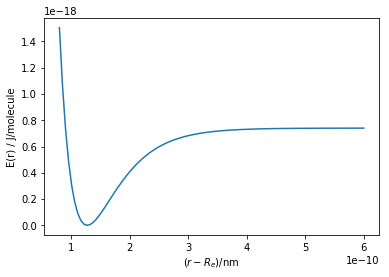

In [16]:
plt.plot(r, E(r))
plt.xlabel('$(r-R_e)$/nm')
plt.ylabel('E(r) / J/molecule')

In [17]:
plt.close()

It might be useful to convert the energy per molecule to energy/mole.

## Extension exercises

### python lambda functions
One-line python functions can be defined using the `lambda` form. This is why the word "lambda" is not allowed as a python identifier (it's a keyword of the language). 

Here is the Morse function written as a [lambda](http://www.diveintopython.net/power_of_introspection/lambda_functions.html):

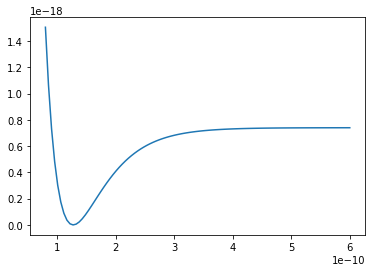

In [18]:
E_l = lambda r: De * (1 - np.exp(-beta*(r-Re)))**2

plt.plot(r, E_l(r))

### Exercise
Plot the function $y = \sin(x) * x^2$ from 0 to $4\pi$ using a lambda function. (Make it a red, dashed line if you can.)

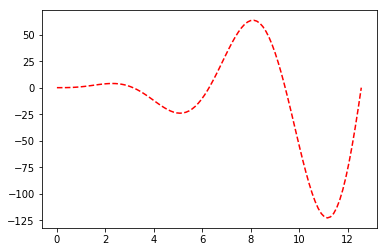

In [19]:
x = np.linspace(0, 4*np.pi, 100)
y = lambda x: np.sin(x) * x** 2

plt.plot(x, y(x), 'r--')

## Compare the harmonic and anharmonic oscillator potentials